In [0]:
!pip install mxnet-cu100

#MXNet (Using Gluon)

In [0]:
import mxnet as mx
from mxnet import nd, autograd, gluon

data_ctx = mx.cpu()
model_ctx = mx.gpu()

##Getting dataset and builing data loader

In [0]:
mnist = mx.test_utils.get_mnist()
num_examples = 60000
batch_size = 64

train_data = mx.gluon.data.DataLoader(
    mx.gluon.data.ArrayDataset(mnist["train_data"][:num_examples],
                               mnist["train_label"][:num_examples].astype('float32')),
                               batch_size, shuffle=True)
test_data = mx.gluon.data.DataLoader(
    mx.gluon.data.ArrayDataset(mnist["test_data"][:num_examples],
                               mnist["test_label"][:num_examples].astype('float32')),
                               batch_size, shuffle=False)

##Building the model

In [0]:
model = gluon.nn.Dense(10)
model.initialize(mx.init.Normal(sigma = 1.0), model_ctx)

##Defining objective function

In [0]:
categoricalcrossentropy = gluon.loss.SoftmaxCrossEntropyLoss()

##Defining out parameters optimizer "with regularization"

In [0]:
optimizer = gluon.Trainer(model.collect_params(), 'sgd', {'learning_rate': 0.1, 'wd': 0.01})

##Defining accuracy function

In [0]:
def accuracy(predictions, labels):
    return nd.mean(predictions.argmax(1) == labels)

##Training the model

In [0]:
epochs = 20
num_batches = 60000/batch_size
learning_rate = .01
lamda = 0.01
losses = []
accs = []

for epoch in range(epochs):
    cumulative_loss = 0
    cumulative_acc = 0
    for features, labels in train_data:
        features = features.as_in_context(model_ctx).reshape((-1, 784))
        labels = labels.as_in_context(model_ctx)
        with autograd.record():
            output = model(features)
            loss = categoricalcrossentropy(output, labels)
        loss.backward()
        optimizer.step(batch_size)
        cumulative_loss += loss.mean()
        cumulative_acc += accuracy(output, labels)
    print(f'Epoch: {epoch} Loss: {cumulative_loss.asscalar()/num_batches} Accuracy: {cumulative_acc.asscalar()/num_batches}')
    losses.append(cumulative_loss.asscalar()/num_batches)
    accs.append(cumulative_acc.asscalar()/num_batches)

Epoch: 0 Loss: 1.514583984375 Accuracy: 0.7021333333333334
Epoch: 1 Loss: 0.44932233072916666 Accuracy: 0.8736
Epoch: 2 Loss: 0.41384384765625 Accuracy: 0.8957666666666667
Epoch: 3 Loss: 0.4110306315104167 Accuracy: 0.8983166666666667
Epoch: 4 Loss: 0.4110748697916667 Accuracy: 0.89845
Epoch: 5 Loss: 0.4110483072916667 Accuracy: 0.8986166666666666
Epoch: 6 Loss: 0.4110732421875 Accuracy: 0.8984833333333333
Epoch: 7 Loss: 0.41138785807291667 Accuracy: 0.8983
Epoch: 8 Loss: 0.41091578776041665 Accuracy: 0.8988666666666667
Epoch: 9 Loss: 0.41153033854166665 Accuracy: 0.8983333333333333
Epoch: 10 Loss: 0.41128349609375 Accuracy: 0.8988
Epoch: 11 Loss: 0.41123287760416666 Accuracy: 0.8983
Epoch: 12 Loss: 0.41116513671875 Accuracy: 0.89815
Epoch: 13 Loss: 0.41147174479166665 Accuracy: 0.8989833333333334
Epoch: 14 Loss: 0.41095126953125 Accuracy: 0.89865
Epoch: 15 Loss: 0.4111547200520833 Accuracy: 0.8987
Epoch: 16 Loss: 0.41065901692708334 Accuracy: 0.8991833333333333
Epoch: 17 Loss: 0.41136

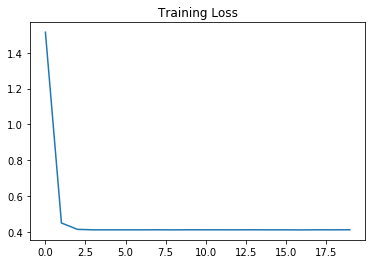

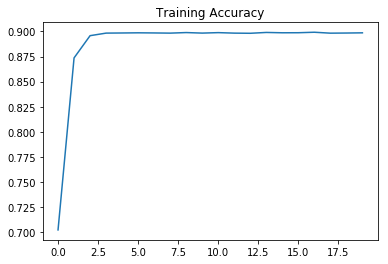

In [0]:
plt.plot(losses)
plt.title('Training Loss')
plt.show()
plt.plot(accs)
plt.title('Training Accuracy')
plt.show()

In [0]:
acc = 0.0
batches = 0
for features, labels in test_data:
    features = features.as_in_context(model_ctx).reshape((-1, 784))
    labels = labels.as_in_context(model_ctx)
    predictions = model(features)
    acc += accuracy(predictions, labels)
    batches += 1
print(f'Test Accuracy: {acc.asscalar()/batches}')

Test Accuracy: 0.9038614649681529


### Even by training out model for full 20 epochs we still managed to force it not to overfit on the training data. 